In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [38]:
vmin = 0
vmax = 1
offset = 500
process = False
normilise = False

rawCLEi = False
rawDigEi = True


In [39]:
#Load Data
#Load Data
photons_data = pd.read_csv('data/MCUpgrade_photons_5x5_fixed.dat', sep='\t')
mergedpi_data = pd.read_csv('data/MCUpgrade_mergedpi0_5x5_fixed.dat', sep='\t')
photons_data.columns = ['p', 'pt', 'eta', 'area', 'nPVs', 'ClusterE', 'ClusterE9',
       'ClE1', 'ClE2', 'ClE3', 'ClE4', 'ClE5', 'ClE6', 'ClE7',
       'ClE8', 'ClE9', 'ClE10', 'ClE11', 'ClE12', 'ClE13',
       'ClE14', 'ClE15', 'ClE16', 'ClE17', 'ClE18', 'ClE19',
       'ClE20', 'ClE21', 'ClE22', 'ClE23', 'ClE24', 'ClE25',
       'DigE1', 'DigE2', 'DigE3', 'DigE4', 'DigE5', 'DigE6',
       'DigE7', 'DigE8', 'DigE9', 'DigE10', 'DigE11', 'DigE12',
       'DigE13', 'DigE14', 'DigE15', 'DigE16', 'DigE17', 'DigE18',
       'DigE19', 'DigE20', 'DigE21', 'DigE22', 'DigE23', 'DigE24',
       'DigE25', 'isPhr2', 'isPhr2r4', 'isPhasym', 'isPhkappa',
       'isPhEseed', 'isPhE2', 'Sxx', 'Sxy', 'Syy']
mergedpi_data.columns = ['p', 'pt', 'eta', 'area', 'nPVs', 'ClusterE', 'ClusterE9',
       'ClE1', 'ClE2', 'ClE3', 'ClE4', 'ClE5', 'ClE6', 'ClE7',
       'ClE8', 'ClE9', 'ClE10', 'ClE11', 'ClE12', 'ClE13',
       'ClE14', 'ClE15', 'ClE16', 'ClE17', 'ClE18', 'ClE19',
       'ClE20', 'ClE21', 'ClE22', 'ClE23', 'ClE24', 'ClE25',
       'DigE1', 'DigE2', 'DigE3', 'DigE4', 'DigE5', 'DigE6',
       'DigE7', 'DigE8', 'DigE9', 'DigE10', 'DigE11', 'DigE12',
       'DigE13', 'DigE14', 'DigE15', 'DigE16', 'DigE17', 'DigE18',
       'DigE19', 'DigE20', 'DigE21', 'DigE22', 'DigE23', 'DigE24',
       'DigE25', 'isPhr2', 'isPhr2r4', 'isPhasym', 'isPhkappa',
       'isPhEseed', 'isPhE2', 'Sxx', 'Sxy', 'Syy']

In [40]:
if rawCLEi:
    shape = ['ClE1', 'ClE2', 'ClE3', 'ClE4', 'ClE5', 'ClE6', 'ClE7', 'ClE8', 'ClE9', 'ClE10', 'ClE11', 'ClE12', 'ClE13', 'ClE14', 'ClE15', 'ClE16', 'ClE17', 'ClE18', 'ClE19', 'ClE20', 'ClE21', 'ClE22', 'ClE23', 'ClE24', 'ClE25']
elif rawDigEi: 
    shape = ['DigE1', 'DigE2', 'DigE3', 'DigE4', 'DigE5',
             'DigE6', 'DigE7', 'DigE8', 'DigE9', 'DigE10',
             'DigE11', 'DigE12', 'DigE13', 'DigE14', 'DigE15',
             'DigE16', 'DigE17', 'DigE18', 'DigE19', 'DigE20',
             'DigE21', 'DigE22', 'DigE23', 'DigE24', 'DigE25']
    fakeshape = ['DigE1', 'DigE2', 'DigE3', 'DigE4', 'DigE5',
             'DigE6', 'DigE7', 'DigE8', 'DigE9', 'DigE10',
             'DigE11', 'DigE12', 'DigE13', 'DigE14', 'DigE15',
             'DigE16', 'DigE17', 'DigE18', 'DigE19', 'DigE20',
              'DigE1', 'DigE2', 'DigE3', 'DigE4', 'DigE5']
    


In [41]:
# -0
m_d = pd.DataFrame()
p_d = pd.DataFrame()
data = pd.DataFrame()
#Retrive important columns
p_d = photons_data[fakeshape]
m_d = mergedpi_data[fakeshape]
p_d.columns = shape;
m_d.columns = shape;

In [42]:
def rotate_to_top_matrice(m):
    max = 0
        
    top = m[1][2]
    bot = m[3][2]
    left = m[2][1]
    right = m[2][3]
    
    if (top >= bot) & (top >= left) & (top >= right):
        max = 0
    elif (bot >= left) & (bot >= right):
        max = 2
    elif left >= right:
        max = 3
    else:
        max = 1
    
    mat = np.rot90(m, max)
    
    top = m[1][2]
    top_left = mat[1][1]
    top_right = mat[1][3]
    bot_left = mat[3][1]
    bot_right = mat[3][3]
    
    max = 0
    if (top_left >= top_right) & (top_left >= bot_left) & (top_left >= bot_right) & (top_left > top):
        max = 0
    elif (top_right >= bot_left) & (top_right >= bot_right) & (top_right > top):
        max = 1
    elif (bot_left >= bot_right) & (bot_left > top):
        max = 3
    elif bot_right > top:
        max = 2
         
    
    return np.rot90(mat, max)

In [43]:
if (process):
    # -1
    # Rotate matrices to top direction
       # -1
    # Rotate matrices to top direction
    p_d = pd.DataFrame(np.array([rotate_to_top_matrice(m) for m in p_d.values.reshape((-1, 5, 5, 1))]).reshape(-1,25))
    p_d.columns = shape
    m_d = pd.DataFrame(np.array([rotate_to_top_matrice(m) for m in m_d.values.reshape((-1, 5, 5, 1))]).reshape(-1,25))
    m_d.columns = shape
    
    if (normilise):
        # -2
        #Normalise data
            #Divide each cell with the entire energy at the cluster
        p_d = p_d[shape]
        m_d = m_d[shape]
        p_d = p_d.assign(suma = p_d.sum(axis=1));
        m_d = m_d.assign(suma = m_d.sum(axis=1));
        p_d_norm = (p_d.T / p_d.suma).T
        m_d_norm = (m_d.T / m_d.suma).T



    # -4
    #Add Labels to data
    m_d_norm['area'] = mergedpi_data[['area']]
    p_d_norm['area'] = photons_data[['area']]

    #Add category = 0 column to dataframe, so we identify merged pi0 as 0
    m_d_norm = m_d_norm.assign(category=pd.Series(np.full((len(m_d_norm['area'])), 0)).values)

    #Add category = 1 column to dataframe, so we identify photons as 1
    p_d_norm = p_d_norm.assign(category=pd.Series(np.full((len(p_d_norm['area'])), 1)).values)


    # -5 
    # Equilibrate category classes
    p_d_norm_0 = p_d_norm[p_d_norm['area'] == 0]
    p_d_norm_0 = p_d_norm_0.iloc[0:len(m_d_norm[m_d_norm['area'] == 0])]

    p_d_norm_1 = p_d_norm[p_d_norm['area'] == 1]
    p_d_norm_1 = p_d_norm_1.iloc[0:len(m_d_norm[m_d_norm['area'] == 1])]

    p_d_norm_2 = p_d_norm[p_d_norm['area'] == 2]
    p_d_norm_2 = p_d_norm_2.iloc[0:len(m_d_norm[m_d_norm['area'] == 2])]

    print (len(p_d_norm_0) + len(p_d_norm_1) + len(p_d_norm_2) == len(m_d_norm))
    p_d_norm = p_d_norm_0.append(p_d_norm_1).append(p_d_norm_2)
    p_d = p_d_norm
    m_d = m_d_norm
    vmin = 0
    vmax = 1
    offset = 500
else:
    m_d['area'] = mergedpi_data[['area']]
    p_d['area'] = photons_data[['area']]
    
    vmin = 0
    vmax = 70000
    offset = 300



/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [44]:
np.array(m_d[m_d['area'] == 0][shape])[0]

array([   48.56399918,    21.8560009 ,   132.57600403,   203.52400207,
          36.52999878,   148.3999939 ,  8111.00390625,   453.77600098,
         211.9920044 ,    38.06399918,    23.28000069,  9240.11230469,
       19724.4726562 ,   781.73999023,   590.19396973,    39.38999939,
         101.70600128,   181.42399597,  1451.85998535,    25.63199997,
          48.56399918,    21.8560009 ,   132.57600403,   203.52400207,
          36.52999878])

In [45]:

x = [i for range_set in range(5) for i in range (1,6)]
y = sorted(x, reverse=True)
  
single_m_0 = np.array(m_d[m_d['area'] == 0][shape])[0]
single_m_1 = np.array(m_d[m_d['area'] == 1][shape])[0]
single_m_2 = np.array(m_d[m_d['area'] == 2][shape])[1]

single_p_0 = np.array(p_d[p_d['area'] == 0][shape])[0]
single_p_1 = np.array(p_d[p_d['area'] == 1][shape])[0]
single_p_2 = np.array(p_d[p_d['area'] == 2][shape])[1]

mean_m_0 = (m_d[m_d['area'] == 0][shape].values).mean(axis=0)
mean_m_1 = (m_d[m_d['area'] == 1][shape].values).mean(axis=0)
mean_m_2 = (m_d[m_d['area'] == 2][shape].values).mean(axis=0)

mean_p_0 = (p_d[p_d['area'] == 0][shape].values).mean(axis=0)
mean_p_1 = (p_d[p_d['area'] == 1][shape].values).mean(axis=0)
mean_p_2 = (p_d[p_d['area'] == 2][shape].values).mean(axis=0)



def plot_cluster_comparasion(weight_0, title_0, weight_1, title_1):
    f, (ax) = plt.subplots(1, 2, figsize=(12,5),sharex=True, sharey=True, constrained_layout=True)
    
    levels = np.linspace(0, 1)
    im = ax[0].hist2d(x, y, (5, 5), weights=weight_0, cmap=plt.cm.jet, vmin=vmin, vmax=vmax)
    ax[1].hist2d(x, y, (5, 5), weights=weight_1, cmap=plt.cm.jet,vmin=vmin, vmax=vmax)
    
    ax[0].set_title(title_0, fontsize=20)
    ax[1].set_title(title_1, fontsize=20)
    
    plt.colorbar(im[3]);
    
    plt.show()






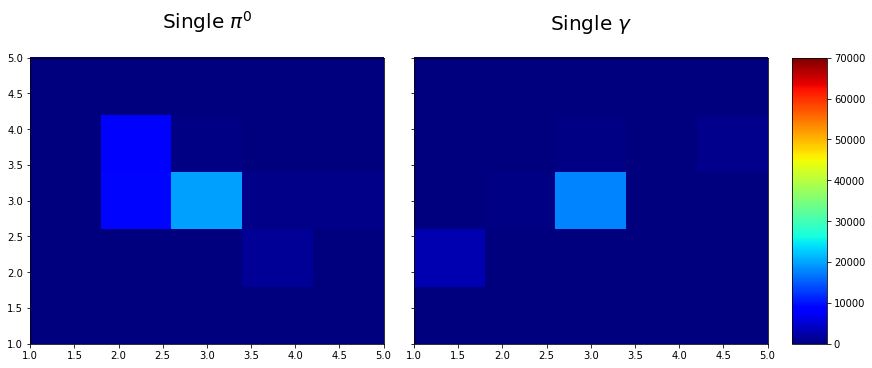

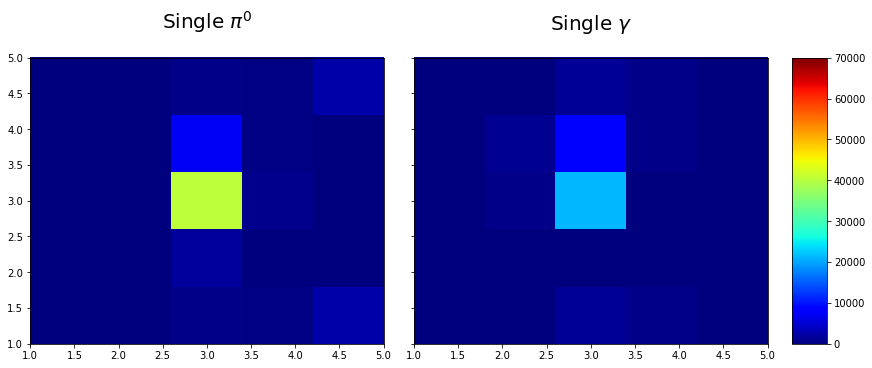

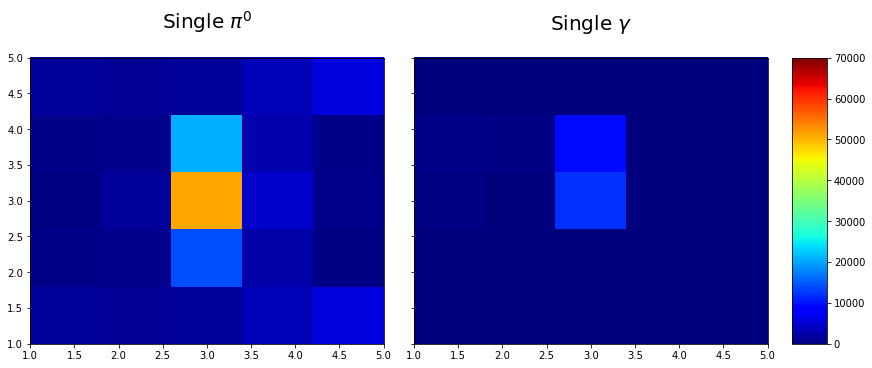

In [46]:

plot_cluster_comparasion(single_m_0,'Single $\pi^0$\n', single_p_0, 'Single $\gamma$\n')
plot_cluster_comparasion(single_m_1,'Single $\pi^0$\n', single_p_1, 'Single $\gamma$\n')
plot_cluster_comparasion(single_m_2,'Single $\pi^0$\n', single_p_2, 'Single $\gamma$\n')



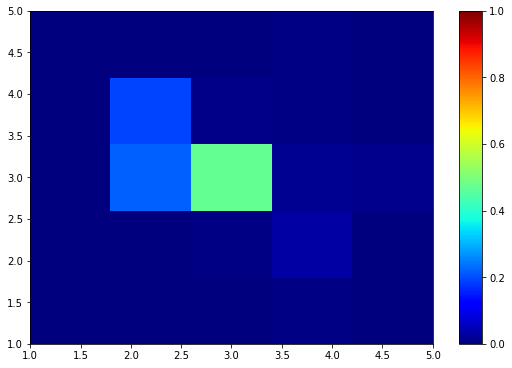

In [99]:

f, (ax) = plt.subplots(1, 1, figsize=(7,5),sharex=True, sharey=True, constrained_layout=True)
levels = np.linspace(0, 1)
im = ax.hist2d(x, y, (5, 5), weights=single_m_0, cmap=plt.cm.jet, vmin=vmin, vmax=vmax)

plt.colorbar(im[3]);


plt.show()

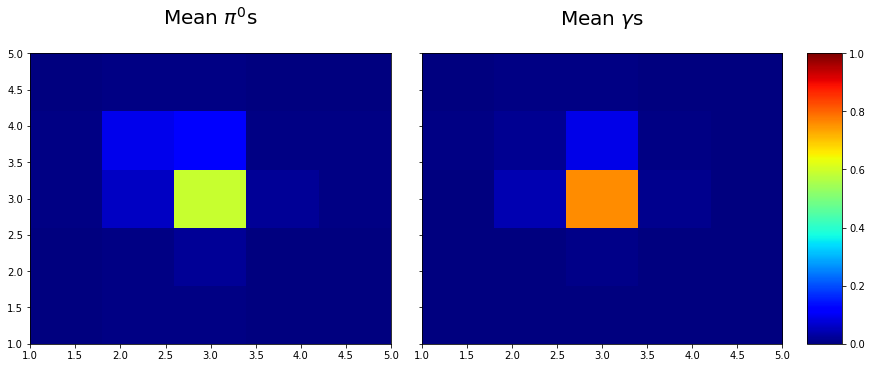

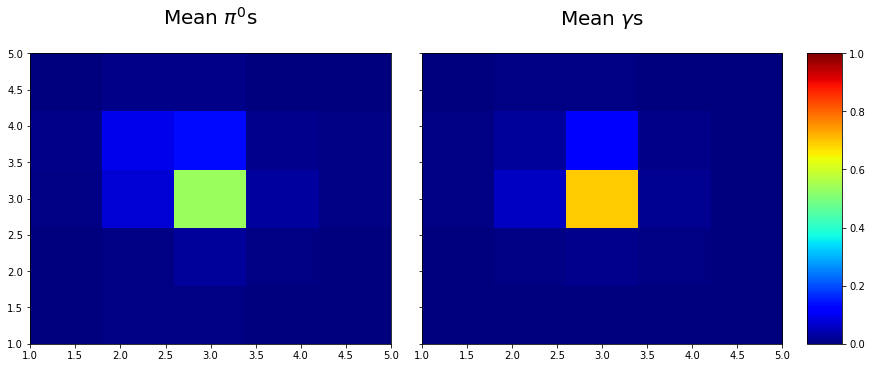

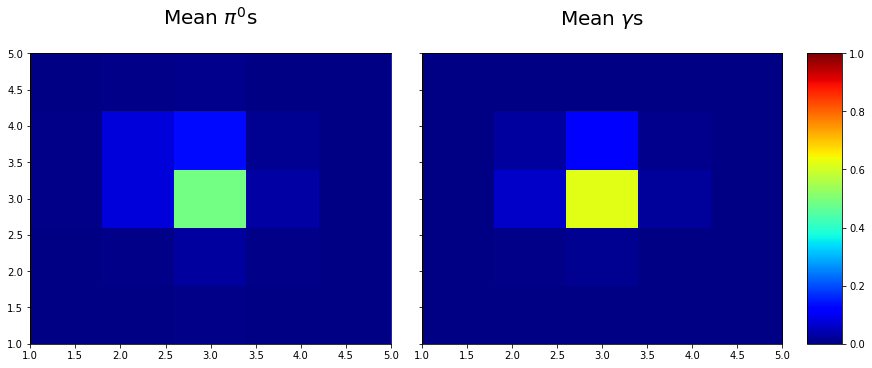

In [100]:

plot_cluster_comparasion(mean_m_0,'Mean $\pi^0$s\n', mean_p_0, 'Mean $\gamma$s\n')
plot_cluster_comparasion(mean_m_1,'Mean $\pi^0$s\n', mean_p_1, 'Mean $\gamma$s\n')
plot_cluster_comparasion(mean_m_2,'Mean $\pi^0$s\n', mean_p_2, 'Mean $\gamma$s\n')



In [ ]:
NOMBRE TOTAL
NOMBRE PER CLASSES I AREAS DEL ECAL

In [125]:
len(p_d)

81598

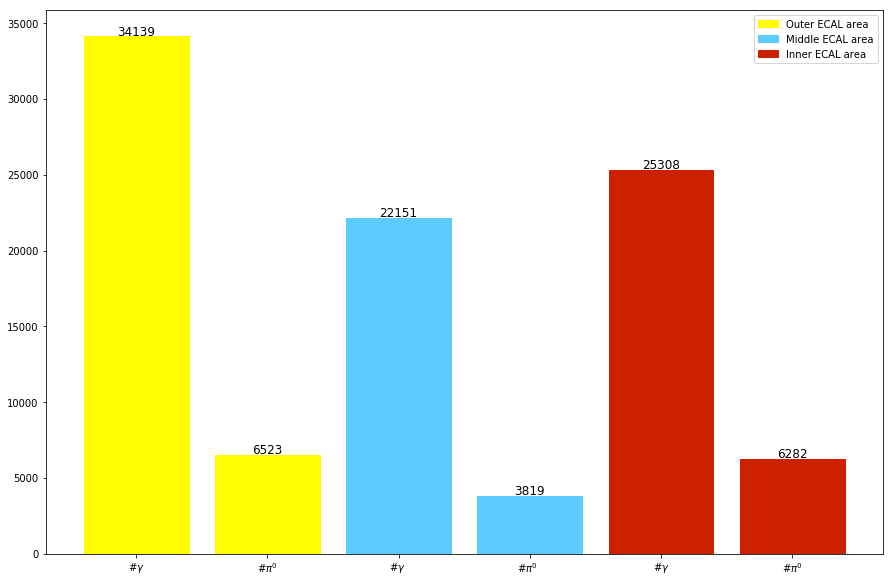

In [132]:
plt.figure(figsize=(15,10))
x = np.arange(8)
barlist = plt.bar(['#$\gamma$ ','#$\pi^0$ ','#$\gamma$  ','#$\pi^0$  ','#$\gamma$','#$\pi^0$'], height= [
                            len(p_d[p_d['area']==0]),len(m_d[m_d['area']==0]),
                            len(p_d[p_d['area']==1]),len(m_d[m_d['area']==1]),
                           len(p_d[p_d['area']==2]),len(m_d[m_d['area']==2])]) 

plt.text(0, len(p_d[p_d['area']==0]) + offset, str(len(p_d[p_d['area']==0])), color='k',verticalalignment='center',horizontalalignment='center',fontsize=12)
plt.text(1, len(m_d[m_d['area']==0]) + offset, str(len(m_d[m_d['area']==0])), color='k',verticalalignment='center',horizontalalignment='center',fontsize=12)

plt.text(2, len(p_d[p_d['area']==1]) + offset, str(len(p_d[p_d['area']==1])), color='k',verticalalignment='center',horizontalalignment='center',fontsize=12)
plt.text(3, len(m_d[m_d['area']==1]) + offset, str(len(m_d[m_d['area']==1])), color='k',verticalalignment='center',horizontalalignment='center',fontsize=12)

plt.text(4, len(p_d[p_d['area']==2]) + offset, str(len(p_d[p_d['area']==2])), color='k',verticalalignment='center',horizontalalignment='center',fontsize=12)
plt.text(5, len(m_d[m_d['area']==2]) + offset, str(len(m_d[m_d['area']==2])), color='k',verticalalignment='center',horizontalalignment='center',fontsize=12)



inner_patch = mpatches.Patch(color=(0.8, 0.125, 0), label='Inner ECAL area')
middle_patch = mpatches.Patch(color=(0.36, 0.8, 1), label='Middle ECAL area')
outter_patch = mpatches.Patch(color=(1, 0.988, 0), label='Outer ECAL area')

plt.legend(handles=[outter_patch,middle_patch,inner_patch])

barlist[0].set_color((1, 0.988, 0))
barlist[1].set_color((1, 0.988, 0))

barlist[2].set_color((0.36, 0.8, 1))
barlist[3].set_color((0.36, 0.8, 1))

barlist[4].set_color((0.8, 0.125, 0))
barlist[5].set_color((0.8, 0.125, 0))

plt.show()

In [200]:
len(p_d)/len(m_d)

1.0

In [205]:
np.sum(np.sum(p_d[p_d['area']==0]))

19539.0

In [204]:
np.sum(np.sum(m_d[m_d['area']==0])) 

13026.000000000005